In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

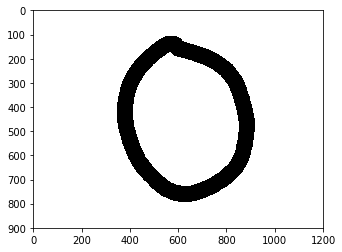

In [19]:
DATADIR = "./TrainImg/"
CATEGORIES= ["0","1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break

In [20]:
print(img_array.shape)

(900, 1200)


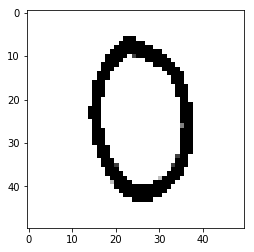

In [21]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= 'gray')
plt.show()

In [22]:
train_data = []

def create_train_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                train_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_train_data()

In [23]:
print(len(train_data))

3410


In [24]:
import random

random.shuffle(train_data)

In [25]:
for sample in train_data[:10]:
    print(sample[1])

30
26
60
61
26
8
57
16
26
14


In [26]:
X = []
y = []

In [27]:
for features, label in train_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [28]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [29]:
pickle_in= open("X.pickle", "rb")
X = pickle.load(pickle_in)
X.shape[1:]

(50, 50, 1)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X = X/255.0

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(62))
model.add(Activation("sigmoid"))

from keras.utils import to_categorical
y_binary = to_categorical(y)

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X,y_binary,batch_size=10, epochs=10, validation_split=0.1)
model.save('captcha_alpha.model')

Train on 3069 samples, validate on 341 samples
Epoch 1/10
3069/3069 [==============================] - 23s 7ms/step - loss: 3.8519 - acc: 0.0645 - val_loss: 3.1867 - val_acc: 0.1965
Epoch 2/10
3069/3069 [==============================] - 22s 7ms/step - loss: 2.3456 - acc: 0.3744 - val_loss: 2.1180 - val_acc: 0.4194
Epoch 3/10
3069/3069 [==============================] - 24s 8ms/step - loss: 1.4317 - acc: 0.5999 - val_loss: 1.8268 - val_acc: 0.5367
Epoch 4/10
3069/3069 [==============================] - 23s 8ms/step - loss: 0.9773 - acc: 0.7126 - val_loss: 1.5996 - val_acc: 0.5836
Epoch 5/10
3069/3069 [==============================] - 23s 8ms/step - loss: 0.6894 - acc: 0.7898 - val_loss: 1.7599 - val_acc: 0.5806
Epoch 6/10
3069/3069 [==============================] - 23s 8ms/step - loss: 0.4860 - acc: 0.8482 - val_loss: 1.7092 - val_acc: 0.6188
Epoch 7/10
3069/3069 [==============================] - 23s 8ms/step - loss: 0.3279 - acc: 0.9009 - val_loss: 1.8398 - val_acc: 0.6129
Epoch 8/

In [ ]:
model.summary()

In [ ]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)


#model = tf.keras.models.load_model('captcha_alpha.model')

prediction = model.predict([prepare('zero.png')])

print(len(prediction[0]))
print(prediction)